In [1]:
# Import libraries and dependencies
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline


In [2]:
 # Load .env enviroment variables
load_dotenv()

True

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3   

In [4]:
 # Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_price = requests.get(btc_url).json()
btc_price = btc_price['data']['1']["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_price = requests.get(eth_url).json()
eth_price = eth_price['data']['1027']["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

total_crypto_value = my_btc_value + my_eth_value

The current value of your 1.2 BTC is $57034.80
The current value of your 5.3 ETH is $18911.67


In [6]:
# Set current amount of shares
my_shares={
    "AGG":200,
    "SPY":50
}

In [7]:
# Setup Alpaca API environment
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [8]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-09-15", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Preview DataFrame
df_ticker

AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2020-05-01 00:00:00-04:00  116.97  117.0998  116.6775  116.900  11778582   
2020-05-04 00:00:00-04:00  116.89  117.0900  116.8700  116.975   6950122   
2020-05-05 00:00:00-04:00  116.96  116.9700  116.8100  116.880   7315932   
2020-05-06 00:00:00-04:00  116.44  116.7100  116.3000  116.450   9313368   
2020-05-07 00:00:00-04:00  116.61  116.7600  116.4200  116.730   7338194   
...                           ...       ...       ...      ...       ...   
2021-09-09 00:00:00-04:00  115.84  116.1470  115.7550  116.100   3232335   
2021-09-10 00:00:00-04:00  115.99  116.0100  115.7801  115.870   2767552   
2021-09-13 00:00:00-04:00  116.00  116.0750  115.9600  116.030   3289881   
2021-09-14 00:00:00-04:00  116.07  116.3800  116.0700  116.280   4036304   
2021-09-15 00:00:00-04:00  116.29  116.2929  116.0900  116.190   3348036   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-05-01 00:00:00-04:00  285.31  290.6572  281.52  282.73  111321036  
2020-05-04 00:00:00-04:00  280.74  283.9000  279.13  283.66   70199660  
2020-05-05 00:00:00-04:00  286.64  289.2500  285.75  286.22   72232658  
2020-05-06 00:00:00-04:00  288.04  288.4600  283.78  284.29   65371977  
2020-05-07 00:00:00-04:00  287.75  289.7800  287.13  287.70   68883538  
...                           ...       ...     ...     ...        ...  
2021-09-09 00:00:00-04:00  450.70  452.5700  448.72  448.94   51603442  
2021-09-10 00:00:00-04:00  451.04  451.4900  445.31  445.50   75763259  
2021-09-13 00:00:00-04:00  448.65  448.9200  444.11  446.56   75103627  
2021-09-14 00:00:00-04:00  448.12  448.3400  443.22  444.18   67959711  
2021-09-15 00:00:00-04:00  444.62  448.4100  443.44  447.87   69265024  

[347 rows x 10 columns]

In [9]:
# Printing AGG and SPY close prices
total_stock_value = 0
for stock in tickers:
    price = df_ticker[stock]["close"][-1]
    print(f"Current {stock} closing price: ${price}\nAmount Held: {my_shares[stock]}\nTotal Value: ${price*my_shares[stock]}\n")
    total_stock_value +=price*my_shares[stock]



Current AGG closing price: $116.19
Amount Held: 200
Total Value: $23238.0

Current SPY closing price: $447.87
Amount Held: 50
Total Value: $22393.5



In [10]:
# Setting monthly income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame({
    "amount":[total_crypto_value, total_stock_value]
})

df_savings.index = ["crypto","shares"]

# Display savings DataFrame
display(df_savings)

,amount
crypto,75946.472
shares,45631.500


array([<AxesSubplot:ylabel='amount'>], dtype=object)

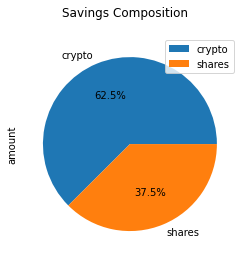

In [11]:
# Plot savings pie chart
df_savings.plot.pie(subplots = True,title = "Savings Composition",autopct="%1.1f%%")

In [12]:
 # Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto_value + total_stock_value

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations, you are rich!")
elif total_savings == emergency_fund:
    print("Congratulations, you are just getting by!")
else:
    print(f"Oh no! You need ${emergency_fund-total_savings} more money")

Congratulations, you are rich!


In [13]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [14]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Preview DataFrame
df_ticker

# Display sample data
df_stock_data

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-05-10 00:00:00-04:00  108.60  108.6600  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.5400  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.9400  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.9400  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.1010  108.8800  109.000  1394153.0   
...                           ...       ...       ...      ...        ...   
2021-04-26 00:00:00-04:00  114.74  114.8015  114.6500  114.650  2867784.0   
2021-04-27 00:00:00-04:00  115.13  115.1300  114.3700  114.370  3421667.0   
2021-04-28 00:00:00-04:00  114.45  114.4685  114.2000  114.440  6185936.0   
2021-04-29 00:00:00-04:00  114.14  114.3700  114.0900  114.370  5796983.0   
2021-04-30 00:00:00-04:00  114.41  114.5150  114.3300  114.500  5160765.0   

                              SPY                                         
                             open    high       low    close      volume  
time                                                                      
2017-05-10 00:00:00-04:00     NaN     NaN       NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.1300  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.6700  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.4500  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.6300  240.100  37206183.0  
...                           ...     ...       ...      ...         ...  
2021-04-26 00:00:00-04:00  417.44  418.22  416.8111  417.640  44689009.0  
2021-04-27 00:00:00-04:00  417.91  418.14  416.3000  417.480  45962264.0  
2021-04-28 00:00:00-04:00  417.81  419.01  416.9000  417.350  45533863.0  
2021-04-29 00:00:00-04:00  420.33  420.72  416.4400  419.990  70607144.0  
2021-04-30 00:00:00-04:00  417.63  418.54  416.3400  417.300  73129109.0  

[1001 rows x 10 columns]

In [15]:
# Configuring a Monte Carlo simulation to forecast thirty years cumulative returns
weight = [0.4,0.6]
    
MC_thirty_year = MCSimulation(
        portfolio_data = df_ticker,
        weights = weight,
        num_simulation = 500, #set to 500 when done
        num_trading_days = 252*30
    )

MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000316,0.992064,0.997122,1.004304,1.006314,0.998773,1.003340,0.989968,1.000324,1.001573,...,1.001240,1.013444,1.000583,0.992655,0.990926,1.002503,0.995661,0.994109,1.009585,0.999323
2,1.001938,0.991955,0.996938,1.010732,1.009651,1.007103,1.015165,0.986681,1.009021,0.999145,...,1.011681,1.028573,0.991953,0.996017,0.989958,1.004215,0.995815,1.002452,1.005847,1.014918
3,0.996122,0.996490,0.990792,1.009722,1.012493,1.006550,1.014268,0.977994,1.015046,1.008893,...,1.008882,1.028836,0.986956,0.992386,0.994139,1.007448,1.001265,1.001958,1.001107,1.014069
4,0.994206,1.010015,0.986748,1.001541,1.021812,1.009481,1.015747,0.970305,1.013698,1.011171,...,1.006443,1.020686,0.994594,0.999442,0.998480,0.997501,1.002151,1.001515,0.995574,1.023340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,615.307177,225.219926,542.181067,168.910282,593.884220,412.942255,758.116220,241.095580,101.505049,224.298111,...,566.913097,855.619619,343.269678,748.908938,461.442384,431.537457,476.523929,751.225723,470.048883,841.401800
7557,613.535339,226.938714,544.407837,168.513713,598.189806,409.151355,752.856878,241.564984,100.569909,225.073252,...,570.535676,848.899321,338.705694,745.409100,462.492988,430.273305,477.615853,750.437878,472.630202,838.319673
7558,608.471906,227.505538,545.156591,169.058453,597.904250,413.567192,757.650688,241.139996,100.721244,227.485741,...,568.946081,850.475664,335.744586,743.487087,460.506697,433.587933,475.799598,746.959764,475.487135,836.360501
7559,610.614682,226.152141,545.567878,170.366639,595.494857,417.679996,760.484674,241.592294,99.593410,227.892408,...,567.606589,855.269051,338.310692,740.499091,463.209575,435.762152,481.919994,747.545084,477.315971,831.776545


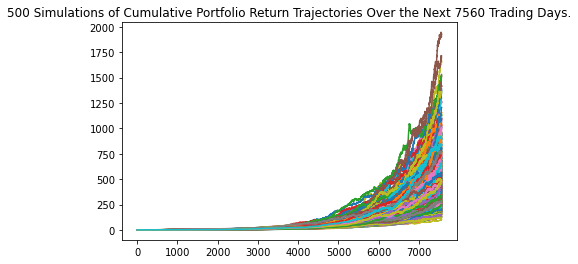

In [16]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

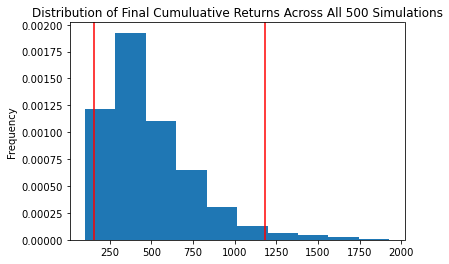

In [17]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()


In [18]:
# Fetch summary statistics from the Monte Carlo simulation results
results = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
results

count            500.000000
mean             493.315836
std              272.504571
min              100.223357
25%              301.530811
50%              433.879806
75%              622.961514
max             1928.296215
95% CI Lower     156.916816
95% CI Upper    1181.479659
Name: 7560, dtype: float64

In [19]:
 # Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(results[8]*initial_investment,2)
ci_upper = round(results[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $3138336.32 and $23629593.18


In [20]:
 # Set initial investment 50% higher
initial_investment = 20000*1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(results[8]*initial_investment,2)
ci_upper = round(results[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $4707504.49 and $35444389.76
